<a href="https://colab.research.google.com/github/emilianog4/Data-Science-Projects/blob/main/calidad_del_vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calidad de vinos** 🍷

## Este es un proyecto en donde utilizando regresion lineal se buscara evaluar cuales son las caracteristicas que mas influyen en la calidad de un buen vino
---


## **Analisis y limpieza de datos**
### En primer lugar importamos las liberias que vamos a utilizar para este proyecto

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from xgboost import plot_importance

import pickle


### Creo el dataset `df` a partir del archivo `calidad_de_vino.csv`

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/calidad_de_vino.csv')

### Visualizo con el metodo `.head()` de pandas las primeras 5 filas del dataset

In [7]:
df.head()

,botella_id,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,color,calidad
0,0,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.28,0.73,11.8,rojo,7
1,1,6.6,0.24,0.28,1.8,0.028,39.0,132.0,0.99182,3.34,0.46,11.4,blanco,5
2,2,9.4,0.59,0.14,2.0,0.084,25.0,48.0,0.99810,3.14,0.56,9.7,rojo,5
3,3,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.2,blanco,6
4,4,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.1,blanco,6


> Tenemos 14 columnas y de estas, la que mas nos interesa es la de **calidad** la cual otorga una puntuacion del 0 al 10 a la calidad del vino de esa fila

### Utilizando el metodo `.info()` para obtener informacion referente al numero de filas, columnas y valores nulos como asi tambien el tipo de cada columna

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   botella_id               6497 non-null   int64  
 1   acidez fija              6497 non-null   float64
 2   acidez volatil           6497 non-null   float64
 3   acido citrico            6497 non-null   float64
 4   azucar residual          6497 non-null   float64
 5   cloruros                 6497 non-null   float64
 6   dioxido de azufre libre  6497 non-null   float64
 7   dioxido de azufre total  6497 non-null   float64
 8   densidad                 6497 non-null   float64
 9   pH                       6497 non-null   float64
 10  sulfatos                 6497 non-null   float64
 11  alcohol                  6497 non-null   float64
 12  color                    6497 non-null   object 
 13  calidad                  6497 non-null   int64  
dtypes: float64(11), int64(2)

> * No hay valores nulos en el dataset ya que hay 6497 entradas y todas las columnas tienen la misma cantidad
* Podemos ver como **color**  es la unica columna de tipo *object* es decir que contiene texto, todas las demas columnas son numericas

### Ahora utilizo el metodo `.describe()` para visualizar un resumen de datos estadisticos como:
* **cantidad de datos**
* la **media**
* **desviacion estandar**
* valor **max**
* valor **min**

In [9]:
df.describe()

,botella_id,acidez fija,acidez volatil,acido citrico,azucar residual,cloruros,dioxido de azufre libre,dioxido de azufre total,densidad,pH,sulfatos,alcohol,calidad
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3248.000000,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1875.666681,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1624.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3248.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,4872.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6496.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


> Podemos observar como hay 6497 datos en cada columna.  
 Con respecto a la calidad:  
   * La calidad **media** es de ~ 5.8
   * La calidad **minima** es 3
   * La calidad **maxima** es 9

### Utilizo el metodo `.value_counts()` para ver en detalle la cantidad de vinos que hay en cada puntaje de calidad

In [10]:
df['calidad'].value_counts()

calidad
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

> Como se puede ver en este conjunto de datos hay mas vinos de calidad 6 (en total 2836) y solo 5 vinos de calidad 9

### Ahora con un grafico de barras utilizando seaborn, visualizo la frecuencia de distintas calidades de vino

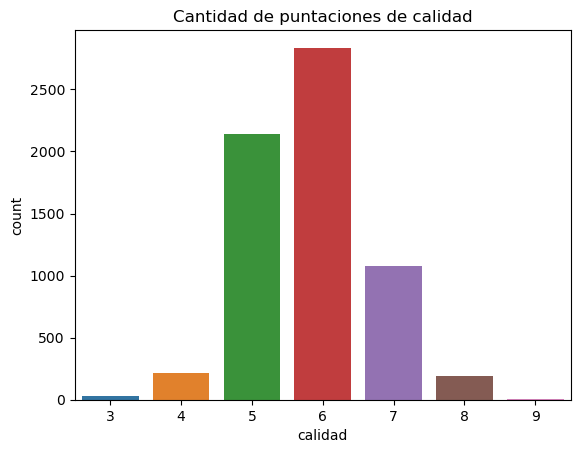

In [11]:
# Creo un grafico countplot para contar la cantidad de valores en la columna 'calidad'
sns.countplot(data=df, x='calidad')
plt.title('Cantidad de puntaciones de calidad')
plt.show()

> Como se puede observar la mayor cantidad se observa en la calidad 6, luego 5 y 7. Esto se condice con lo encontrado en pasos anteriores.

### Con los datos obtenidos hasta ahora resulta interesante poder crear una nueva columna, que llamaremos **categorias de calidad** dividida en 3 categorias:
* **Baja**: calidad de 0 a 51.
* **Media**: calidad de 6 a 7
* **Alta**: calidad de 8 a 10

In [12]:
# Creo la columna 'categorias de calidad' del tipo categoria cambiando el puntaje de calidad por el formato categoria para visualizarlo
df['categorias de calidad'] = df['calidad'].apply(lambda x: 'baja' if x < 6 else ('alta' if x > 7 else 'media'))
df['categorias de calidad'].value_counts()

categorias de calidad
media    3915
baja     2384
alta      198
Name: count, dtype: int64

>Podemos ver como hay **3915** vinos de *calidad media* los cuales representan la mayor cantidad en el dataset.

### Ahora transformo la columna a tipo *category*

In [13]:
df['categorias de calidad'] = df['categorias de calidad'].astype('category')

In [14]:
#data = pd.get_dummies(df['color'])
#df = pd.concat([df.drop("color", axis = 1), data], axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   botella_id               6497 non-null   int64   
 1   acidez fija              6497 non-null   float64 
 2   acidez volatil           6497 non-null   float64 
 3   acido citrico            6497 non-null   float64 
 4   azucar residual          6497 non-null   float64 
 5   cloruros                 6497 non-null   float64 
 6   dioxido de azufre libre  6497 non-null   float64 
 7   dioxido de azufre total  6497 non-null   float64 
 8   densidad                 6497 non-null   float64 
 9   pH                       6497 non-null   float64 
 10  sulfatos                 6497 non-null   float64 
 11  alcohol                  6497 non-null   float64 
 12  color                    6497 non-null   object  
 13  calidad                  6497 non-null   int64   
 14  categori

### En un grafico de barras visualizo la frecuencia en las 3 categorias de calidad

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


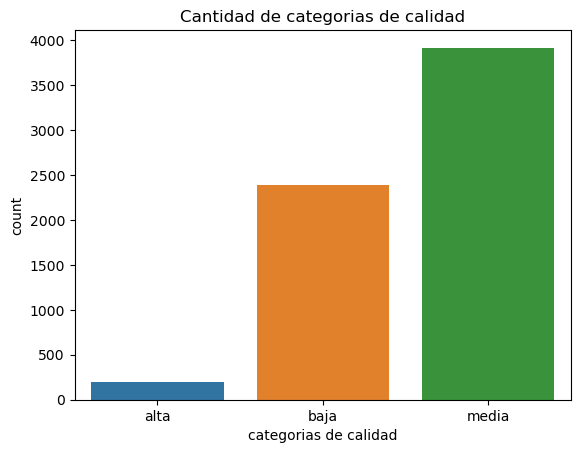

In [16]:
# Con seaborn grafico la cuenta de categorias de calidad
sns.countplot(data=df, x='categorias de calidad')
plt.title('Cantidad de categorias de calidad')
plt.show()

## **Manejo de outliers**
### En un grafico de dispersion visualizo la relacion entre **azucar residual** y cantidad de **alcohol** con respecto a al **calidad** del vino

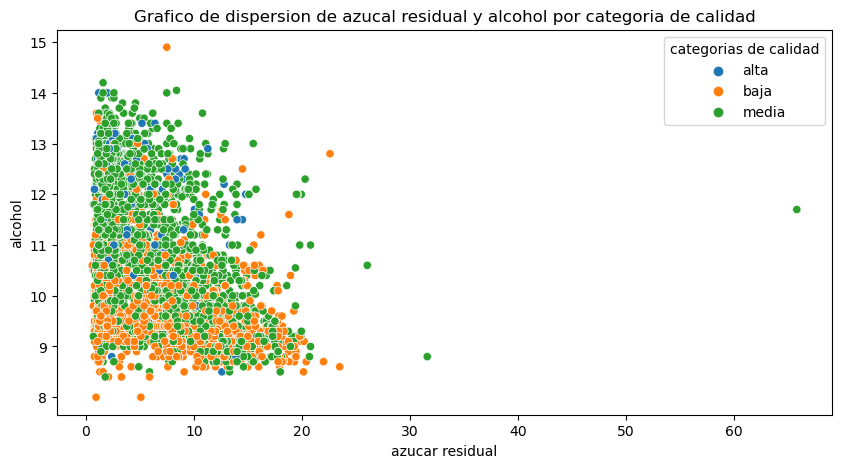

In [17]:
# Grafico de dispersion que muestra la relacion entre el azucar residual del vino y la cantidad de alcohol con respecto a la calidad
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = 'azucar residual', y = 'alcohol',hue = "categorias de calidad")
plt.title('Grafico de dispersion de azucal residual y alcohol por categoria de calidad')
plt.show()

> Se observan valores atipicos de azucar residual y alcohol en calidad media de vinos

### En un grafico de dispersion visualizo la relacion entre **acidez volatil** y **acidez fija** con respecto a al **calidad** del vino

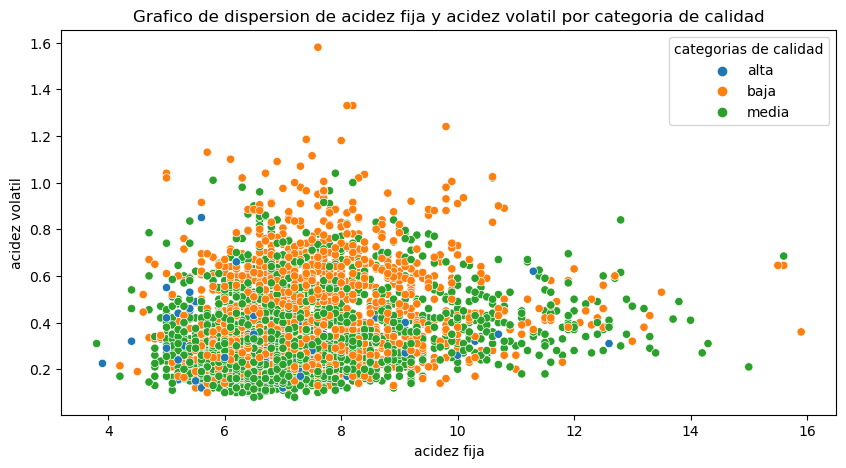

In [18]:
# Grafico de dispersion que muestra la relacion entre la acidez fija y volatil del vino con respecto a la calidad
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='acidez fija', y='acidez volatil', hue="categorias de calidad")
plt.title('Grafico de dispersion de acidez fija y acidez volatil por categoria de calidad')
plt.show()

> Se observan valores atipicos de acidez volatil y acidez fija en calidad baja y media de vinos

### En un grafico de caja y bigotes visualizo la relacion entre **densidad** con respecto a las **categorias de calidad** del vino

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


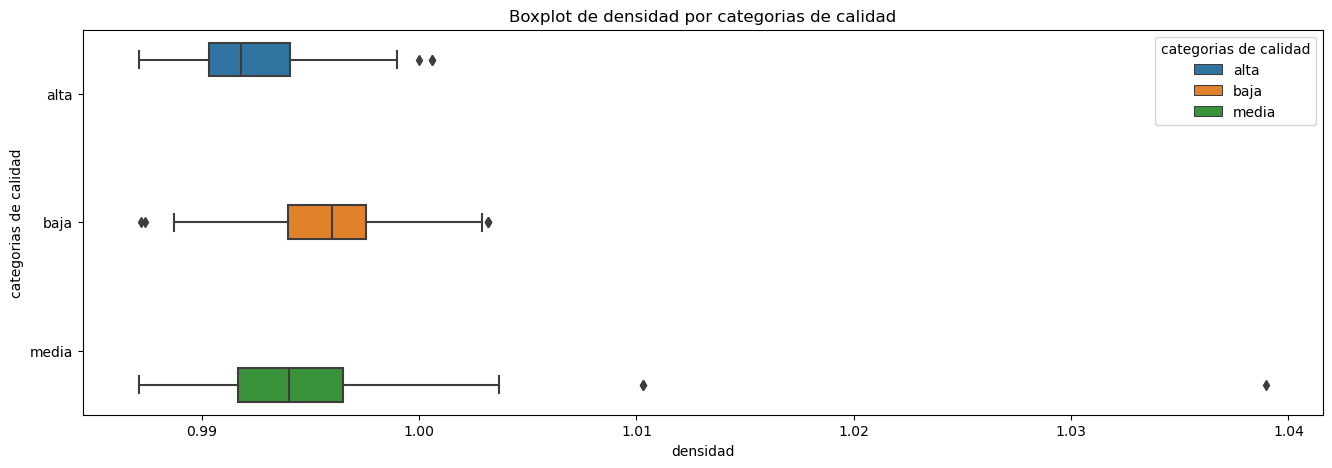

In [19]:
# Grafico de caja para visualizar valores atipicos presentes en la columna densidad
plt.figure(figsize=(16,5))
sns.boxplot(data=df, x='densidad', y='categorias de calidad', hue='categorias de calidad')
plt.title('Boxplot de densidad por categorias de calidad')
plt.show()

> Se observan valores atipicos de densidad en las 3 calidades de vinos

### En un grafico de caja y bigotes visualizo la relacion entre **acido citrico** con respecto a las **categorias de calidad** del vino

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


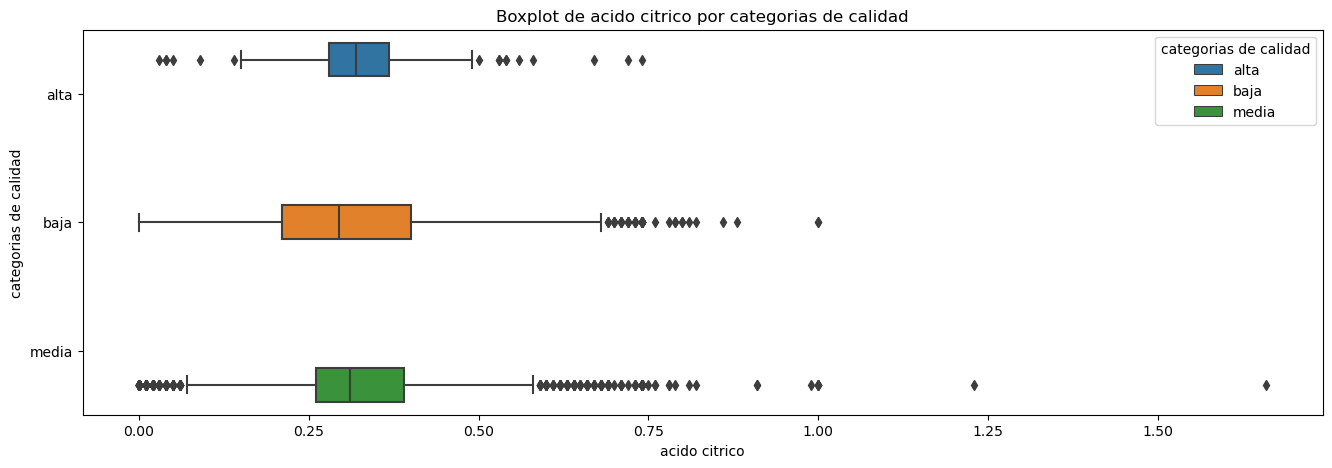

In [20]:
# Grafico de caja para visualizar valores atipicos presentes en la columna acido citrico
plt.figure(figsize=(16,5))
sns.boxplot(y = 'categorias de calidad', x = 'acido citrico', data = df, hue='categorias de calidad')
plt.title('Boxplot de acido citrico por categorias de calidad')
plt.show()

> Se observan valores atipicos de acido citrico en las 3 categorias de calidad de vinos

### En un grafico de caja y bigotes visualizo la relacion entre **azucar residual** con respecto a las **categorias de calidad** del vino

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


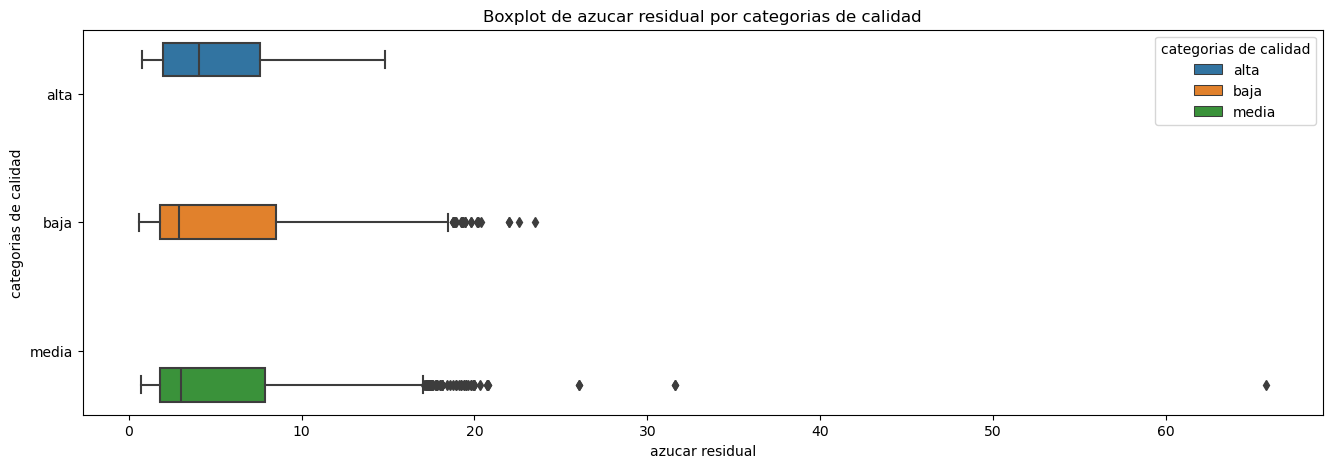

In [21]:
# Grafico de caja para visualizar valores atipicos presentes en la columna azucal residual
plt.figure(figsize=(16,5))
sns.boxplot(y = 'categorias de calidad', x = 'azucar residual', data = df, hue='categorias de calidad')
plt.title('Boxplot de azucar residual por categorias de calidad')
plt.show()

> Se observan valores atipicos de azucar residual en calidad media y baja de vinos

## **Analisis de correlacion entre variables**

### Usando seaborn veo la distribucion de los datos en las columnas *acidez fija*, *cloruros*, *dioxido de azufre total*, *densidad*, *alcohol* para ver como pueden afectar a *calidad* que es nuestro objetivo

In [22]:
#df2 = df.drop('botella_id', axis=1)
#sns.pairplot(df2, hue='color')

> La mayoría de las variables numéricas presentes en el dataset parecen tener distribuciones aproximadamente normales, con ligeras asimetrías en algunos casos.

In [23]:
df.columns

Index(['botella_id', 'acidez fija', 'acidez volatil', 'acido citrico',
       'azucar residual', 'cloruros', 'dioxido de azufre libre',
       'dioxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol',
       'color', 'calidad', 'categorias de calidad'],
      dtype='object')

### Creo un objeto `StandardScaler()` llamado `scaler`. Este escalador se utiliza para estandarizar las características (features) numéricas en un dataset eliminando la media y escalando a una varianza unitaria.
### Utilizando el método `.fit_transform()` del escalador en las características seleccionadas. Este método realiza dos pasos:
* ### **Ajuste**: Calcula la media y la desviación estándar de cada característica en los datos proporcionados.
* ### **Transformación**: Centra y escala los datos utilizando las estadísticas calculadas. Esto elimina esencialmente la media de cada característica y las escala para que tengan una varianza unitaria (desviación estándar de 1). La salida de este paso es una nueva matriz NumPy llamada `scaled` que contiene los datos estandarizados.   

### Finalmente el metodo `.T` transpone los datos anteriores.

In [24]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['botella_id', 'acidez fija', 'acidez volatil', 'acido citrico',
       'azucar residual', 'cloruros', 'dioxido de azufre libre',
       'dioxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol', 'calidad']])
scaled.T

array([[-1.73178424, -1.73125105, -1.73071787, ...,  1.73071787,
         1.73125105,  1.73178424],
       [ 1.76242617, -0.47465165,  1.68528556, ...,  0.75959818,
         0.37389511,  0.14247327],
       [ 1.33840912, -0.6054167 ,  1.52064279, ..., -0.11946024,
         0.00202887, -0.78765037],
       ...,
       [ 1.33561272, -0.47897144,  0.19309677, ...,  0.12588995,
        -1.62148739, -0.34455779],
       [ 1.09691202,  0.76151599, -0.66391714, ...,  1.51615706,
        -1.08316218, -1.2508602 ],
       [ 1.35322771, -0.93722961, -0.93722961, ...,  0.20799905,
         0.20799905, -0.93722961]])

> El propósito de **estandarizar los datos** es a menudo mejorar el rendimiento de los algoritmos de aprendizaje automático que son sensibles a la escala de las características.

### Ahora usando los datos anteriores creo una matriz de covarianza llamada `covariance_matrix` utilizando el metodo de numpy `.cov()`

In [25]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00015394,  0.01147721,  0.00734712,  0.00372185, -0.00899809,
         0.01577718, -0.01431618, -0.01136638,  0.00503405, -0.00580454,
         0.00747013, -0.00273385, -0.01118101],
       [ 0.01147721,  1.00015394,  0.21904197,  0.32448567, -0.11199852,
         0.29824068, -0.28277895, -0.32910456,  0.45898063, -0.25273937,
         0.29961386, -0.09546622, -0.07675502],
       [ 0.00734712,  0.21904197,  1.00015394, -0.3780395 , -0.19604135,
         0.37718233, -0.35261158, -0.41454   ,  0.27133741,  0.26149465,
         0.22601847, -0.03764618, -0.26574038],
       [ 0.00372185,  0.32448567, -0.3780395 ,  1.00015394,  0.14247316,
         0.03900402,  0.1331463 ,  0.19527203,  0.09616873, -0.32985896,
         0.05620595, -0.01049511,  0.08554488],
       [-0.00899809, -0.11199852, -0.19604135,  0.14247316,  1.00015394,
        -0.12896035,  0.40293266,  0.49555786,  0.55260201, -0.26736099,
        -0.18595603, -0.3594701 , -0.03698618],
       [ 0.01577718,  0.298240

> La matriz de covarianza proporciona información sobre la variabilidad conjunta y la relación lineal entre las características. Tambien es útil para comprender la relación entre las características, pero no indica necesariamente la existencia de una relación causal.

### Creo un `heatmap` para visualizar de manera gráfica los resultados obtenidos. Los valores de correlación van desde -1 (correlación negativa perfecta) hasta 1 (correlación positiva perfecta).
### En general, las correlaciones más fuertes (valores absolutos más cercanos a 1) se encuentran entre las variables relacionadas con la **densidad** y el **alcohol** y la **calidad** del vino.

<Axes: >

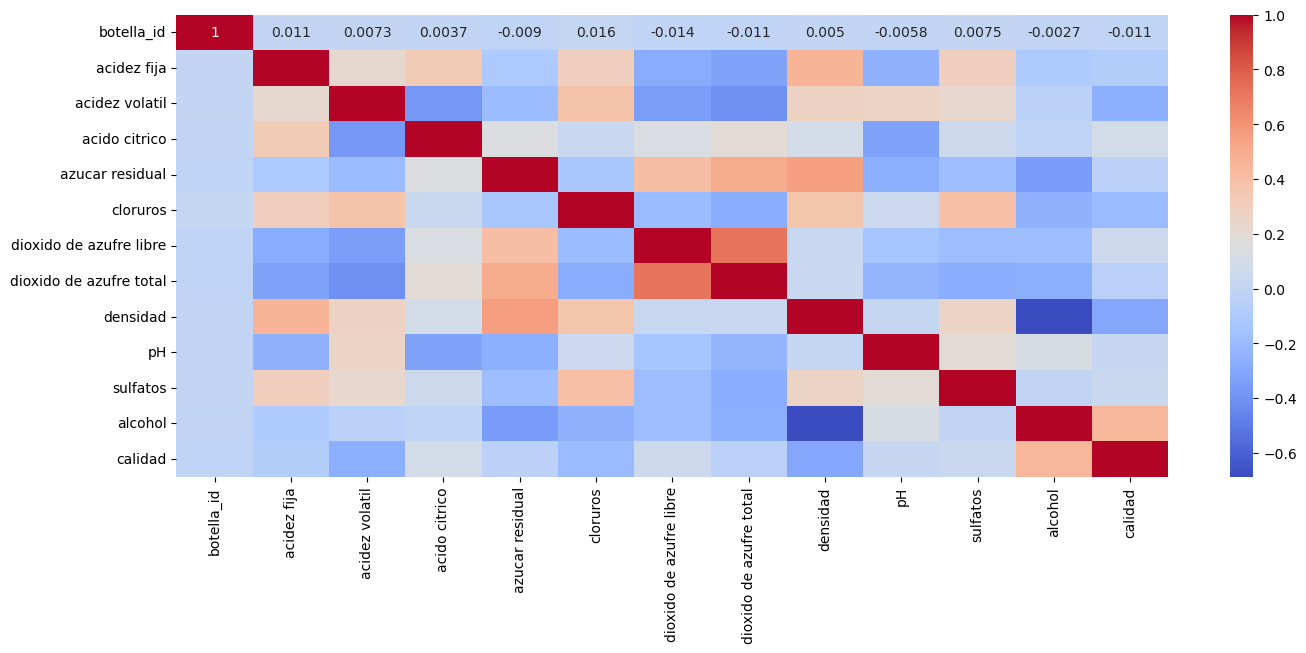

In [26]:
df_corr = df[['botella_id', 'acidez fija', 'acidez volatil', 'acido citrico',
       'azucar residual', 'cloruros', 'dioxido de azufre libre',
       'dioxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol', 'calidad']].corr()

plt.figure(figsize=(16, 6))  # Ajusto el ancho y alto
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

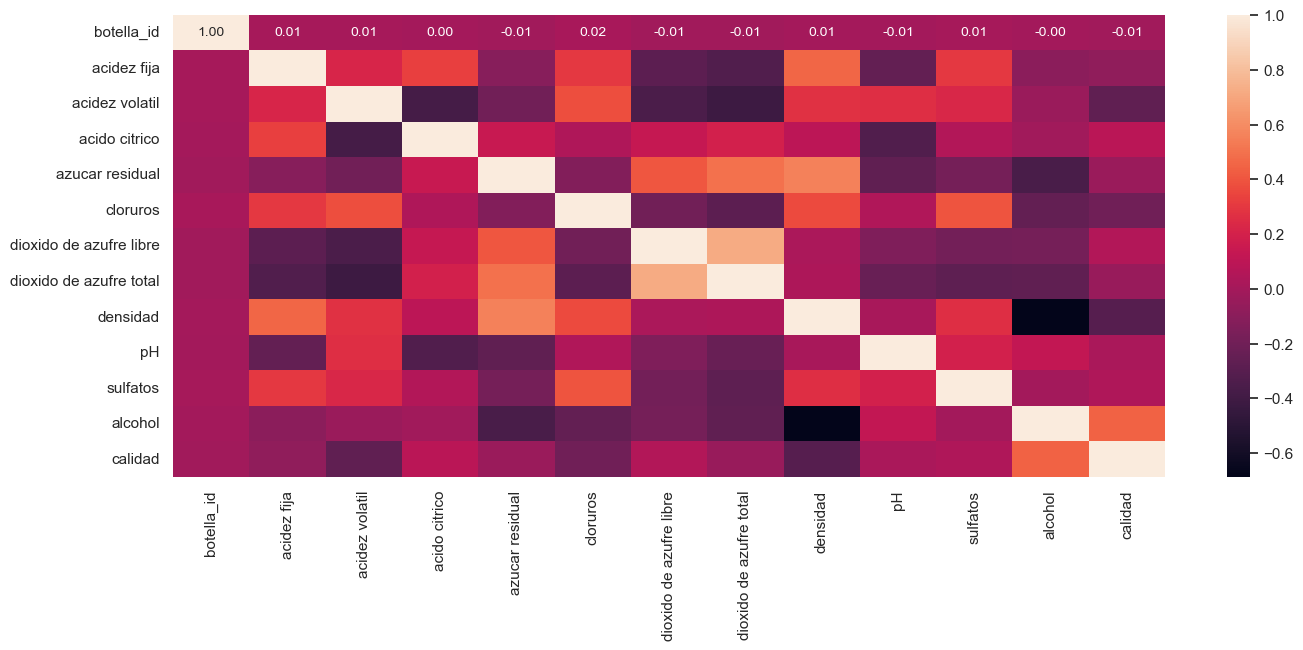

In [27]:
plt.figure(figsize=(16, 6))  # Ajusto el ancho y alto
sns.set(font_scale=1)
hm = sns.heatmap(covariance_matrix,
                 cbar=True,
                 annot=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=['botella_id', 'acidez fija', 'acidez volatil', 'acido citrico',
       'azucar residual', 'cloruros', 'dioxido de azufre libre',
       'dioxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol', 'calidad'],
                 xticklabels=['botella_id', 'acidez fija', 'acidez volatil', 'acido citrico',
       'azucar residual', 'cloruros', 'dioxido de azufre libre',
       'dioxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol', 'calidad'])

> Es importante tener en cuenta que *la correlación no implica causalidad*. Solo porque dos variables estén correlacionadas no significa que una cause la otra.

In [28]:
#Muestro las correlaciones mas fuertes
df.drop(['color','categorias de calidad'], axis=1).corr()[['calidad']].sort_values(by='calidad', ascending = False)

,calidad
calidad,1.000000
alcohol,0.444319
acido citrico,0.085532
dioxido de azufre libre,0.055463
sulfatos,0.038485
pH,0.019506
botella_id,-0.011179
azucar residual,-0.036980
dioxido de azufre total,-0.041385
acidez fija,-0.076743


> Se observa que las relaciones mas fuertes son:
* **alcohol** con ~ 0.44
* **densidad** con ~ -0.3  

E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


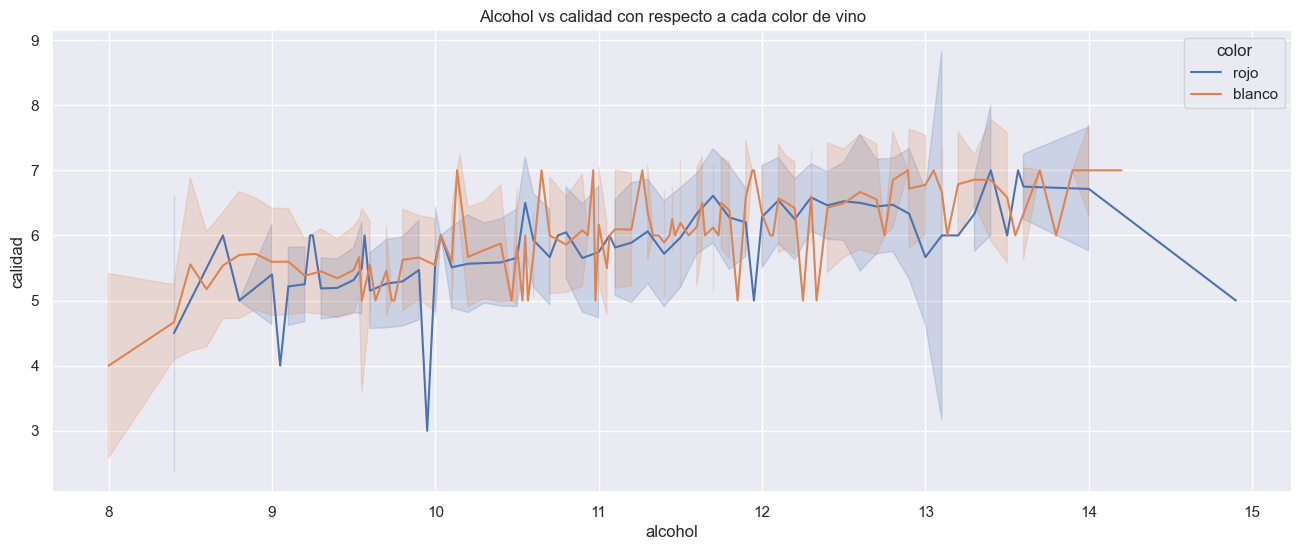

In [29]:
plt.figure(figsize=(16,6))
sns.lineplot(x="alcohol", y="calidad", errorbar="sd", data=df, hue="color")
plt.title('Alcohol vs calidad con respecto a cada color de vino')
plt.show()

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


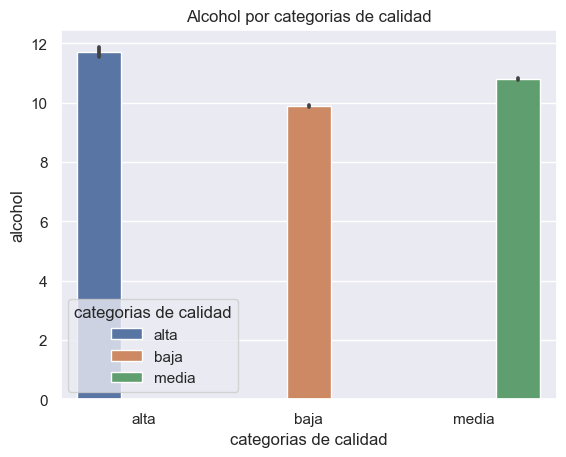

In [30]:
sns.barplot(data=df, x='categorias de calidad', y='alcohol', hue="categorias de calidad")
plt.title('Alcohol por categorias de calidad')
plt.show()

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


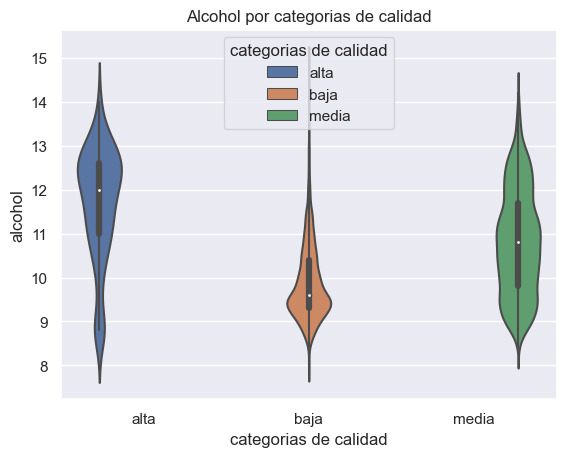

In [31]:
sns.violinplot(data=df, x='categorias de calidad', y='alcohol', hue="categorias de calidad")
plt.title('Alcohol por categorias de calidad')
plt.show()

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


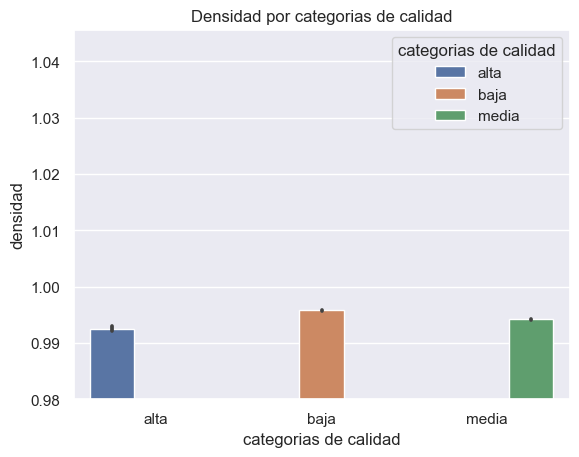

In [32]:
sns.barplot(data=df, x='categorias de calidad', y='densidad', hue="categorias de calidad")
plt.title('Densidad por categorias de calidad')
plt.ylim(0.98)
plt.show()

E:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


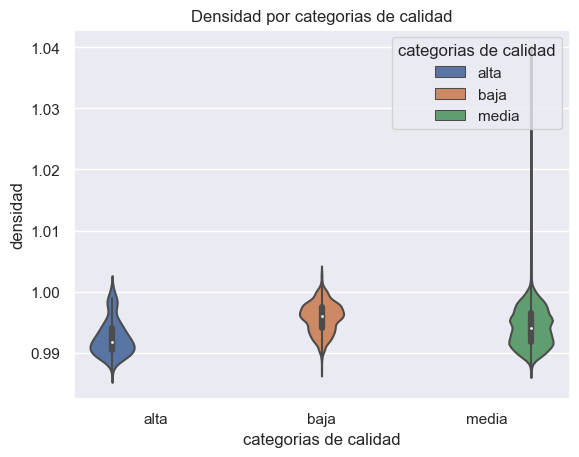

In [33]:
sns.violinplot(data=df, x='categorias de calidad', y='densidad', hue="categorias de calidad")
plt.title('Densidad por categorias de calidad')
plt.show()

## **Modelo de regresion lineal**
###**Preparacion de los datos**
* `X` representa el conjunto de features que representa la *variable independiente* del modelo.
* `y` es la **calidad del vino** y representa la *variable dependiente* del modelo.  

In [34]:
# X representa las variables independientes (características)
X = df[['acidez fija', 'acidez volatil', 'acido citrico',
       'azucar residual', 'cloruros', 'dioxido de azufre libre',
       'dioxido de azufre total', 'densidad', 'pH', 'sulfatos', 'alcohol']]

# y sera la variable dependiente (calidad del vino)
y = df['calidad']

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###**Creacion del modelo de regresión lineal**
* Creamos una instancia de un objeto `LinearRegression()` de la biblioteca `scikit-learn`.

In [35]:
# Crea un modelo de regresión lineal
model = LinearRegression()

###**Entrenamiento del modelo de regresión lineal**
* Ajustamos el modelo de regresión lineal a los datos de entrenamiento (X, y)

In [36]:
# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

###**Evaluacion del modelo de regresión lineal**
Evaluamos el rendimiento del modelo entrenado utilizando métricas como:
* **El error cuadrático medio (MSE)** : Siempre es no negativo, y `los valores más cercanos a cero son mejores`.
* **El coeficiente de determinación $R^2$** : `un valor de 1 indica un ajuste perfecto` y un modelo muy fiable para las previsiones futuras, mientras que `un valor de 0 indicaría que el cálculo no logra modelar los datos con precisión` en absoluto.

In [37]:
# Predecir las categorías de calidad para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2}")


MSE: 0.53708822547343
R^2: 0.2778292360979947


> Un **MSE** bajo (cercano a cero) y un $R^2$ alto indican un buen ajuste del modelo a los datos. En nuestro caso los valores no son muy buenos, por lo que el modelo admite mejoras.

## Mejoras del modelo / Pruebas con XGBoost

In [47]:
# Defino la variable X
X = df.drop(['calidad', 'categorias de calidad', 'botella_id', 'color'], axis=1)

# Defino la variable y
y = df['calidad']

# Divido nuevamente el modelo en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Creamos el modelo XGBoost
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=0, learning_rate=0.1)

In [48]:
# Entrenamos el modelo
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [49]:
# y_pred seran las predicciones en el conjunto de prueba
y_pred = xgb_regressor.predict(X_test)

# Calculamos el MSE
from sklearn.metrics import mean_squared_error
mse_xgb = mean_squared_error(y_test, y_pred)
print("MSE:", mse_xgb)

# Calculamos el R^2
from sklearn.metrics import r2_score
r2_xgb = r2_score(y_test, y_pred)
print("R2:", r2_xgb)

MSE: 0.37537338128581227
R2: 0.5055281068191783


- **MSE:** El MSE de XGBoost es aproximadamente un 27% menor que el de la regresión lineal, lo que indica que, en promedio, **los errores de predicción de XGBoost son un 27% más pequeños.**
- **$R^2$:** El $R^2$ de XGBoost es casi un 75% mayor que el de la regresión lineal, lo que significa que **XGBoost explica una mayor proporción de la variabilidad en la calidad de los vinos.**

In [41]:
# Muestro la importancia de las variables en el modelo
print(xgb_regressor.feature_importances_)

[0.03405583 0.10459037 0.04953158 0.06716471 0.05670582 0.0825856
 0.06523082 0.05305605 0.0634263  0.0875792  0.3360738 ]


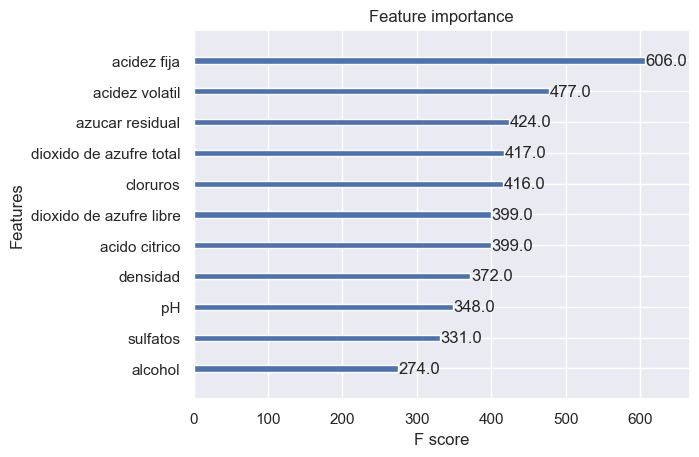

In [42]:
# Graficamos la importancia de las features
plot_importance(xgb_regressor)
plt.show()

> Esta línea de código imprime las importancias de las características del modelo de regresión XGBoost entrenado. **Cuanto mayor sea el valor, más importante será la característica para predecir la variable objetivo** (en este caso, la calidad del vino).

In [44]:
xgbr = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=100, subsample=0.8)

cv_params = {'max_depth': [3,4,5,6],
              'min_child_weight': [1,2,3,4,5,6],
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma': [i/10.0 for i in range(0,5)],
              'n_estimators': [5,10,15,50,100,200]
              }

clf = GridSearchCV(xgbr, param_grid = cv_params, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Best score found on development set:")
print(clf.best_score_)

Best parameters set found on development set:
{'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 200}
Best score found on development set:
0.461741557017931


In [46]:
pickle.dump(clf, open('xgb_cv.sav', 'wb'))

In [55]:
# Utilizamos los mejores parametros que encontramos con GridSearch en el modelo XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror',
                             random_state=0,
                             gamma=0.0,
                             learning_rate=0.1,
                             max_depth=6,
                             min_child_weight=4,
                             n_estimators=500)

In [ ]:
# Entrenamos nuvamente el modelo
xgb_regressor.fit(X_train, y_train)

# Obtenemos las nuevas predicciones en el conjunto de prueba
y_pred = xgb_regressor.predict(X_test)

# Calculamos nuevamente el MSE
from sklearn.metrics import mean_squared_error
mse_xgb = mean_squared_error(y_test, y_pred)
print("MSE Anterior: 0.39")
print("MSE Actual:", round(mse_xgb,2))

# Calculamos nuevamente el R^2
from sklearn.metrics import r2_score
r2_xgb = r2_score(y_test, y_pred)
print("R2 Anterior: 0.48")
print("R2 Actual:", round(r2_xgb,2))

> De esta manera pudimos optimizar un poco mas el modelo